In [1]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from scipy.stats import mode
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [2]:
def plot_data(X,y, title = ""):
    x_1 = [sample[0] for sample in X]
    x_2 = [sample[1] for sample in X]
    df = pd.DataFrame()
    df['x_1']=x_1
    df['x_2']=x_2
    df['y']=y
    sns.lmplot(x='x_1', y='x_2', data=df, hue='y', fit_reg = False)
    ax = plt.gca()
    ax.set_title(title)

In [3]:
def shuffle_two_list(X, y):
    temp_zip = list(zip(X,y))
    random.shuffle(temp_zip)
    X, y = zip(*temp_zip)
    return X, y

In [4]:
def get_least_frequent_items(x):
    counter = collections.Counter(x).most_common()
    least_occurence = counter[-1][1]
    return [least_common[0] for least_common in counter if least_common[1]==least_occurence]

In [5]:
#Support multiple minorClass - take minorClass as a list input 
def condensed_NN_balancing(X, y, minorClass = None, random_state = 0):
    X,y = shuffle_two_list(X,y)
    if minorClass == None:
        least_frequent_items = get_least_frequent_items(y)
        print("Finding least frequent items...")
        print("Add it(them) to the minorClass...")
        minorClass = least_frequent_items
        
    index_minorClass = [index for index, y_i in enumerate(y) if y_i in minorClass]
    
    X_tuple, y_tuple = zip(*[(X[idx], y[idx]) for idx in index_minorClass])
    X_store = list(X_tuple)
    y_store = list(y_tuple)
    plot_data(X_store, y_store)
    KN_clf = KNeighborsClassifier(n_neighbors=1)
    KN_clf.fit(X_store, y_store)
    for X_i, y_i in zip(X,y):
        if(y_i not in minorClass and KN_clf.predict([X_i])!=y_i):
            X_store.append(X_i)
            y_store.append(y_i)
            KN_clf.fit(X_store, y_store)
    
    return X_store, y_store
    

In [6]:
number_of_entry = 160
X = [[random.gauss(2,0.1),random.gauss(2,0.3)] for i in range(int(number_of_entry/8)) ]
X += [[random.gauss(2,0.1),random.gauss(3,0.3)] for i in range(int(7*number_of_entry/8))]
y = [0 if i >=number_of_entry/8 else 1 for i in range(number_of_entry)]

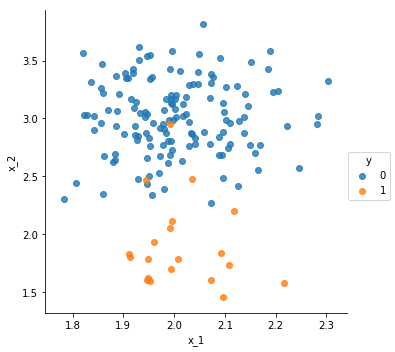

In [7]:
plot_data(X,y)

Finding least frequent items...
Add it(them) to the minorClass...


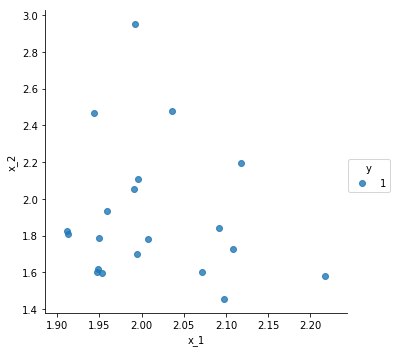

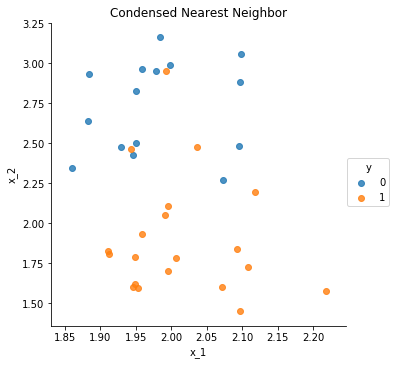

In [8]:
X_T, y_T = condensed_NN_balancing(X, y)
plot_data(X_T,y_T, "Condensed Nearest Neighbor")